# NAME    :P.NARENDER
# Roll No.:2211CS010322
# Group   :4 (3rd year)

In [1]:
import pandas as pd
df = pd.read_excel("MIDMARKS.xlsx")
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


# Importing pandas and reading Excel file data

In [2]:
df = df.drop([564, 601])

In [3]:
df[df['DV'].isnull()]

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS


# Filtering rows where 'DV' subject column is null

# Renaming column 'M-II' to 'M2' in dataframe

In [4]:
columns_to_convert = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
for col in columns_to_convert:
 df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total'] = df['DV'] + df['M-II'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0
...,...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0
714,NaN,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0
715,NaN,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0
716,NaN,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0


In [5]:
df['S.NO'] = range(1, len(df) + 1)

In [6]:
df['SECTION'] = df['SECTION'].fillna('SIGMA')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 717
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     716 non-null    int64  
 1   SECTION  716 non-null    object 
 2   DV       705 non-null    float64
 3   M-II     704 non-null    float64
 4   PP       701 non-null    float64
 5   BEEE     697 non-null    float64
 6   FL       702 non-null    float64
 7   FIMS     694 non-null    float64
 8   Total    682 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.9+ KB


In [8]:
df=df.fillna(0)

In [9]:
df['PERCENTAGE'] = (df['Total'] /120)*100
print(df)

     S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  Total  PERCENTAGE
0       1   ALPHA  12.0   0.0  17.0   9.0  19.0  15.0   72.0   60.000000
1       2   ALPHA  19.0  12.0  16.0  16.0  18.0   3.0   84.0   70.000000
2       3   ALPHA  18.0  14.0  18.0  18.0  18.0  16.0  102.0   85.000000
3       4   ALPHA  15.0   9.0  19.0  17.0  19.0  15.0   94.0   78.333333
4       5   ALPHA  18.0  17.0  19.0  19.0  20.0  18.0  111.0   92.500000
..    ...     ...   ...   ...   ...   ...   ...   ...    ...         ...
713   712    ZETA  19.0   8.0   8.0  19.0  17.0  18.0   89.0   74.166667
714   713    ZETA  12.0   1.0   7.0  10.0  20.0   8.0   58.0   48.333333
715   714    ZETA  17.0   6.0  14.0  14.0  17.0  18.0   86.0   71.666667
716   715    ZETA  12.0   1.0   6.0   7.0  15.0  12.0   53.0   44.166667
717   716    ZETA  19.0  14.0  17.0  16.0  20.0  19.0  105.0   87.500000

[716 rows x 10 columns]


# Calculating percentage based on 'Total' column values

In [10]:
df[df['SECTION'] == 'ALPHA']['DV']

0     12.0
1     19.0
2     18.0
3     15.0
4     18.0
      ... 
85     3.0
86    17.0
87    13.0
88     2.0
89    10.0
Name: DV, Length: 90, dtype: float64

In [11]:
df[df['SECTION'] == 'BETA']['DV']

90     17.0
91     14.0
92     11.0
93     14.0
94     12.0
       ... 
175    14.0
176     6.0
177    12.0
178    16.0
179    15.0
Name: DV, Length: 90, dtype: float64

In [12]:
from scipy.stats import ttest_ind
ttest_ind(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'BETA']['DV'])

TtestResult(statistic=0.6207084248259586, pvalue=0.5355854399866022, df=178.0)

In [13]:
ttest_ind(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'BETA']['DV'] , equal_var=False)

TtestResult(statistic=0.6207084248259586, pvalue=0.5356400219163465, df=166.5388753745943)

In [14]:
from scipy.stats import ttest_rel
ttest_rel(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'BETA']['DV'])

TtestResult(statistic=0.6677896583545824, pvalue=0.5059958752914141, df=89)

In [15]:
df.DV.mean()

14.787709497206704

In [48]:
ttest_ind(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'BETA']['DV'])


TtestResult(statistic=0.6207084248259586, pvalue=0.5355854399866022, df=178.0)

In [49]:
ttest_ind(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'DELTA']['DV'])

TtestResult(statistic=-0.6553774955607539, pvalue=0.5130708533507982, df=178.0)

In [62]:
from scipy.stats import stats
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='SIGMA']['DV'],df.DV.mean())
print(t_statistic,p_value)

2.881042866488959 0.004990510123188154


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\4077781952.py:2: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='SIGMA']['DV'],df.DV.mean())


In [71]:
from scipy.stats import stats

In [72]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='ALPHA']['DV'],df.DV.mean())
print(t_statistic,p_value)

-2.616154646179782 0.010446384280899498


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\1164518312.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='ALPHA']['DV'],df.DV.mean())


In [73]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='BETA']['DV'],df.DV.mean())
print(t_statistic,p_value)

-4.444375088320685 2.5314931787997426e-05


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\1428391005.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='BETA']['DV'],df.DV.mean())


In [74]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='GAMMA']['DV'],df.DV.mean())
print(t_statistic,p_value)

0.044413529739783554 0.9646742748333578


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\1577313677.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='GAMMA']['DV'],df.DV.mean())


In [75]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='DELTA']['DV'],df.DV.mean())
print(t_statistic,p_value)

-2.027862439583779 0.04556465252959875


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\825041322.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='DELTA']['DV'],df.DV.mean())


In [76]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='SIGMA']['DV'],df.DV.mean())
print(t_statistic,p_value)

2.881042866488959 0.004990510123188154


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\3939717943.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='SIGMA']['DV'],df.DV.mean())


In [77]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='OMEGA']['DV'],df.DV.mean())
print(t_statistic,p_value)

3.2903789429100354 0.0014349291303171465


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\2977294326.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='OMEGA']['DV'],df.DV.mean())


In [78]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='ZETA']['DV'],df.DV.mean())
print(t_statistic,p_value)

1.145074331917612 0.25524830899967893


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\3614205482.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='ZETA']['DV'],df.DV.mean())


In [79]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='EPSILON']['DV'],df.DV.mean())
print(t_statistic,p_value)

1.218862767982525 0.22619090688375254


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\969866371.py:1: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='EPSILON']['DV'],df.DV.mean())


In [80]:
ttest_rel(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'DELTA']['DV'])

TtestResult(statistic=-0.6919067946130043, pvalue=0.4907970084314781, df=89)

In [81]:
ttest_rel(df[df['SECTION'] == 'ALPHA']['DV'] , df[df['SECTION'] == 'GAMMA']['DV'])

TtestResult(statistic=-1.769224101059647, pvalue=0.08028203231580917, df=89)

In [16]:
def assign_grade(percentage):
    if percentage >= 90:
        return 'A'
    elif percentage >= 80:
        return 'B'
    elif percentage >= 70:
        return 'C'
    elif percentage >= 60:
        return 'D'
    else:
        return 'F'
df['GRADE'] = df['PERCENTAGE'].apply(assign_grade)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,PERCENTAGE,GRADE
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.000000,D
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.000000,C
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.000000,B
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.333333,C
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.500000,A
...,...,...,...,...,...,...,...,...,...,...,...
713,712,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74.166667,C
714,713,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48.333333,F
715,714,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,71.666667,C
716,715,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44.166667,F


# Assigning grades based on percentage values in dataframe

In [17]:
def assign_skills(DV):
    if DV >=18 :
        return "very good"
        
    elif DV >=15 :
        return 'good'
    elif DV >= 13:
        return 'average'
    else:
        return 'poor'
df['DV-skills'] = df['DV'].apply(assign_skills)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,PERCENTAGE,GRADE,DV-skills
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.000000,D,poor
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.000000,C,very good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.000000,B,very good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.333333,C,good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.500000,A,very good
...,...,...,...,...,...,...,...,...,...,...,...,...
713,712,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74.166667,C,very good
714,713,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48.333333,F,poor
715,714,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,71.666667,C,good
716,715,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44.166667,F,poor


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\682902871.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DV-skills", data=df, palette="viridis")


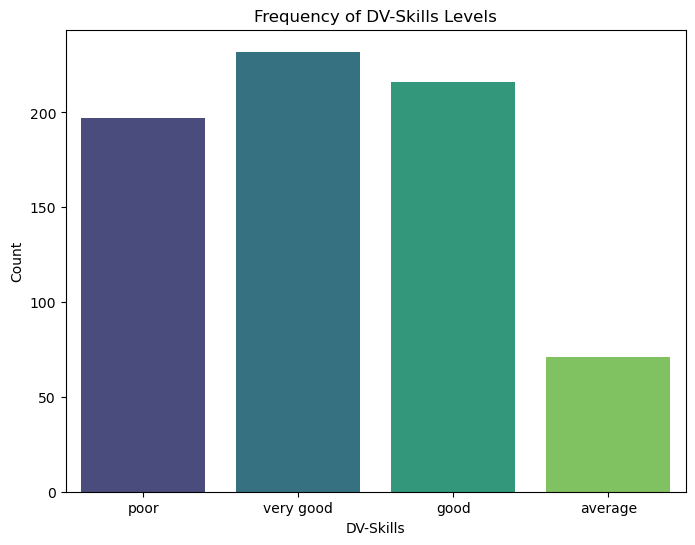

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x="DV-skills", data=df, palette="viridis")
plt.title("Frequency of DV-Skills Levels")
plt.xlabel("DV-Skills")
plt.ylabel("Count")
plt.show()


C:\Users\Naren\AppData\Local\Temp\ipykernel_18188\2141699028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DV-skills", y="Total", data=df, palette="coolwarm")


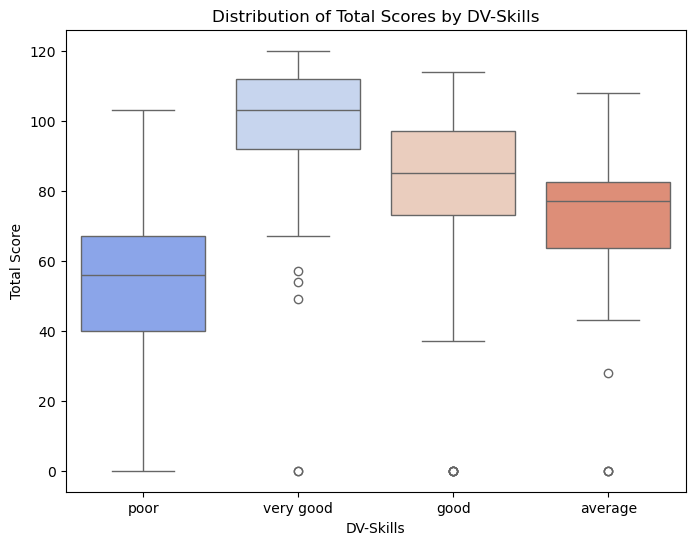

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="DV-skills", y="Total", data=df, palette="coolwarm")
plt.title("Distribution of Total Scores by DV-Skills")
plt.xlabel("DV-Skills")
plt.ylabel("Total Score")
plt.show()

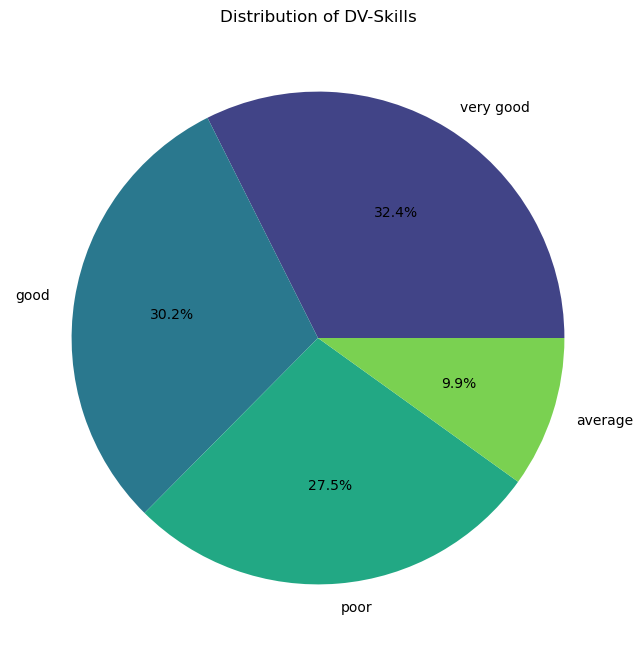

In [20]:
import seaborn as sns
plt.figure(figsize=(8, 8))
dv_skills_counts = df["DV-skills"].value_counts()
plt.pie(dv_skills_counts, labels=dv_skills_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(dv_skills_counts)))
plt.title("Distribution of DV-Skills")
plt.show()

In [21]:
subjects = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
subset = df[df[subjects].eq(20).any(axis=1)]
print("Subset of Students who scored 20 in any subject:")
print(subset)
for subject in subjects:
    count_20 = (df[subject] == 20).sum()
    print(f"Students who scored 20 in {subject}: {count_20}")

Subset of Students who scored 20 in any subject:
     S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  Total  PERCENTAGE  \
4       5   ALPHA  18.0  17.0  19.0  19.0  20.0  18.0  111.0   92.500000   
6       7   ALPHA  15.0  10.0  20.0  20.0  15.0  14.0   94.0   78.333333   
7       8   ALPHA  17.0  17.0  19.0  20.0  19.0  13.0  105.0   87.500000   
8       9   ALPHA  10.0  18.0   0.0  20.0  19.0  15.0    0.0    0.000000   
9      10   ALPHA  18.0  19.0  20.0  20.0  20.0  15.0  112.0   93.333333   
..    ...     ...   ...   ...   ...   ...   ...   ...    ...         ...   
705   704    ZETA  16.0   0.0  11.0  16.0  20.0   0.0    0.0    0.000000   
709   708    ZETA  19.0  17.0  12.0  17.0  20.0  16.0  101.0   84.166667   
711   710    ZETA  18.0   9.0  12.0  20.0  16.0  16.0   91.0   75.833333   
714   713    ZETA  12.0   1.0   7.0  10.0  20.0   8.0   58.0   48.333333   
717   716    ZETA  19.0  14.0  17.0  16.0  20.0  19.0  105.0   87.500000   

    GRADE  DV-skills  
4       A  very

In [22]:
df['DV-skills'].value_counts()

DV-skills
very good    232
good         216
poor         197
average       71
Name: count, dtype: int64

In [23]:
df[df['SECTION'] == 'ALPHA']['GRADE'].value_counts()

GRADE
A    23
F    23
C    18
B    16
D    10
Name: count, dtype: int64

# Counting grade frequencies for 'ALPHA' section in dataframe

In [24]:
df[df['SECTION'] == 'BETA']['GRADE'].value_counts()

GRADE
F    32
C    17
D    16
B    15
A    10
Name: count, dtype: int64

# Counting grade frequencies for 'BETA' section in dataframe

In [25]:
df[df['SECTION'] == 'DELTA']['GRADE'].value_counts()

GRADE
F    38
D    16
B    16
C    12
A     8
Name: count, dtype: int64

# Counting grade frequencies for 'DELTA' section in dataframe

In [26]:
df[df['SECTION'] == 'EPSILON']['GRADE'].value_counts()

GRADE
F    43
C    15
D    14
B    11
A     5
Name: count, dtype: int64

# Counting grade frequencies for 'EPSILON' section in dataframe

In [27]:
df[df['SECTION'] == 'GAMMA']['GRADE'].value_counts()

GRADE
F    31
C    21
D    15
B    14
A     9
Name: count, dtype: int64

# Counting grade frequencies for 'GAMMA' section in dataframe

In [28]:
df[df['SECTION'] == 'OMEGA']['GRADE'].value_counts()

GRADE
C    21
F    21
A    20
B    15
D    13
Name: count, dtype: int64

In [29]:
df[df['SECTION'] == 'SIGMA']['GRADE'].value_counts()

GRADE
A    29
B    18
F    18
D    14
C     9
Name: count, dtype: int64

# Counting grade frequencies for 'SIGMA' section in dataframe

In [30]:
df[df['SECTION'] == 'ZETA']['GRADE'].value_counts()

GRADE
F    36
C    20
D    16
B    14
A     4
Name: count, dtype: int64

# Counting grade frequencies for 'ZETA' section in dataframe

In [31]:
a_grades = df[df['GRADE'] == 'A']
a_grades['SECTION'].value_counts()

SECTION
SIGMA      29
ALPHA      23
OMEGA      20
BETA       10
GAMMA       9
DELTA       8
EPSILON     5
ZETA        4
Name: count, dtype: int64

# Counting sections with 'A' grades in dataframe

In [32]:
DF=df.sort_values("Total",ascending=True)
DF

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,PERCENTAGE,GRADE,DV-skills
369,370,GAMMA,18.0,15.0,13.0,20.0,15.0,0.0,0.0,0.000000,F,very good
487,488,OMEGA,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.000000,F,poor
336,337,EPSILON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,F,poor
495,496,OMEGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,F,poor
82,83,ALPHA,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,F,poor
...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,DELTA,20.0,20.0,20.0,19.0,20.0,20.0,119.0,99.166667,A,very good
507,508,OMEGA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100.000000,A,very good
596,596,SIGMA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100.000000,A,very good
505,506,OMEGA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100.000000,A,very good


# Sorting dataframe by 'Total' in ascending order

In [33]:
d=df.loc[(df['Total']>=25) & (df['Total']<=75)]
d=d.reset_index()
d

,index,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,PERCENTAGE,GRADE,DV-skills
0,0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.000000,D,poor
1,20,21,ALPHA,4.0,2.0,5.0,3.0,16.0,9.0,39.0,32.500000,F,poor
2,25,26,ALPHA,6.0,10.0,10.0,11.0,13.0,10.0,60.0,50.000000,F,poor
3,27,28,ALPHA,5.0,4.0,3.0,12.0,13.0,5.0,42.0,35.000000,F,poor
4,29,30,ALPHA,8.0,2.0,11.0,10.0,13.0,12.0,56.0,46.666667,F,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,700,699,ZETA,17.0,7.0,7.0,12.0,13.0,9.0,65.0,54.166667,F,good
228,701,700,ZETA,15.0,4.0,3.0,13.0,14.0,13.0,62.0,51.666667,F,good
229,710,709,ZETA,18.0,1.0,6.0,12.0,11.0,9.0,57.0,47.500000,F,very good
230,714,713,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48.333333,F,poor


In [34]:
DF = df.sort_values(by='PP', ascending=False).tail(10)
DF


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,PERCENTAGE,GRADE,DV-skills
394,395,GAMMA,20.0,8.0,0.0,0.0,13.0,13.0,54.0,45.0,F,very good
8,9,ALPHA,10.0,18.0,0.0,20.0,19.0,15.0,0.0,0.0,F,poor
551,552,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,poor
562,563,SIGMA,7.0,0.0,0.0,5.0,15.0,16.0,0.0,0.0,F,poor
88,89,ALPHA,2.0,17.0,0.0,3.0,15.0,2.0,39.0,32.5,F,poor
336,337,EPSILON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,poor
673,672,ZETA,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,F,poor
611,610,SIGMA,2.0,0.0,0.0,3.0,10.0,9.0,24.0,20.0,F,poor
669,668,ZETA,16.0,6.0,0.0,0.0,8.0,9.0,0.0,0.0,F,good
556,557,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,poor


In [35]:
df[df["SECTION"]=="ALPHA"].mean(numeric_only=True)


S.NO          45.500000
DV            13.411111
M-II          13.711111
PP            15.933333
BEEE          15.622222
FL            16.177778
FIMS          12.700000
Total         86.600000
PERCENTAGE    72.166667
dtype: float64

In [36]:
df.SECTION[df.DV<10].value_counts()


SECTION
ALPHA      17
BETA       17
DELTA      14
GAMMA      11
OMEGA      10
ZETA        8
SIGMA       6
EPSILON     4
Name: count, dtype: int64

In [37]:
df.SECTION[df.PP<10].value_counts()

SECTION
ZETA       50
EPSILON    49
GAMMA      36
DELTA      28
OMEGA      16
SIGMA      14
ALPHA      12
BETA        8
Name: count, dtype: int64

In [38]:
df.SECTION[df.BEEE<10].value_counts()

SECTION
DELTA      46
BETA       41
SIGMA      23
OMEGA      21
ZETA       18
EPSILON    17
GAMMA      17
ALPHA       8
Name: count, dtype: int64

In [39]:
df.SECTION[df.FL<10].value_counts()

SECTION
ZETA       15
OMEGA      12
EPSILON     8
GAMMA       2
SIGMA       2
ALPHA       1
BETA        1
DELTA       1
Name: count, dtype: int64

In [40]:
df.SECTION[df.FIMS<10].value_counts()

SECTION
GAMMA      23
ALPHA      22
EPSILON    22
ZETA       20
BETA       11
SIGMA       9
OMEGA       7
DELTA       4
Name: count, dtype: int64

In [41]:
df['BC']=(df[['DV','M2','PP','BEEE','FL','FIMS']]<10).sum(axis=1)
df

KeyError: "['M2'] not in index"

In [ ]:
def assign_skills(PP):
    if PP >=18 :
        return "very good"
        
    elif PP >=15 :
        return 'good'
    elif PP >= 13:
        return 'average'
    else:
        return 'poor'

df['Programming-skills'] = df['PP'].apply(assign_skills)
df

In [ ]:
df['Programming-skills'].value_counts()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Programming-skills", data=df, palette="Set2")
plt.title("Programming Skills Distribution")
plt.xlabel("Programming Skills")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Programming-skills"].value_counts().plot( kind="pie", autopct="%1.1f%%", colors=sns.color_palette("Set2"), figsize=(6, 6))
plt.title("Programming Skills Proportions")
plt.ylabel("")  
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x="Programming-skills", y="Total", data=df, jitter=True, palette="Set1")
plt.title("Distribution of Total Scores by Programming Skill")
plt.xlabel("Programming Skills")
plt.ylabel("Total Score")
plt.show()

In [ ]:
 df.BC.value_counts()

In [ ]:
df['DV_Backlog'] = df['DV'] < 10
df['M2_Backlog'] = df['M-II'] < 10
df['PP_Backlog'] = df['PP'] < 10
df['BEEE_Backlog'] = df['BEEE'] < 10
df['FL_Backlog'] = df['FL'] < 10
df['FIMS_Backlog'] = df['FIMS'] < 10
subject_backlogs = {
    'DV': df['DV_Backlog'].sum(),
    'M2': df['M2_Backlog'].sum(),
    'PP': df['PP_Backlog'].sum(),
    'BEEE': df['BEEE_Backlog'].sum(),
    'FL': df['FL_Backlog'].sum(),
    'FIMS': df['FIMS_Backlog'].sum(),
}
print(subject_backlogs)

In [ ]:
df['Total_Backlogs'] = (
    (df['DV'] < 10) +
    (df['M-II'] < 10) +
    (df['PP'] < 10) +
    (df['BEEE'] < 10) +
    (df['FL'] < 10) +
    (df['FIMS'] < 10)
)
section_backlogs = df.groupby('SECTION')['Total_Backlogs'].sum().reset_index()
section_backlogs.columns = ['Section', 'Backlogs']
print(section_backlogs)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=section_backlogs, x='Section', y='Backlogs', palette='rocket')
plt.title("Total Backlogs in Each Section")
plt.xlabel("Section")
plt.ylabel("Number of Backlogs")
plt.show()

In [ ]:
labels = section_backlogs['Section']
sizes = section_backlogs['Backlogs']
colors = sns.color_palette("pastel", len(labels))  # Example: "pastel" palette
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Percentage of Backlogs in Each Section")
plt.show()

In [ ]:
backlog_counts = pd.DataFrame(list(subject_backlogs.items()), columns=['Subject', 'Backlogs'])
sns.barplot(data=backlog_counts, x='Subject', y='Backlogs', palette='viridis')
plt.title("Total Backlogs in Each Subject")
plt.xlabel("Subjects")
plt.ylabel("Number of Backlogs")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['BC'],color='red',edgecolor='white',bins=9)
plt.xlabel("Backlogs count")
plt.ylabel("Students")
plt.title("Histogram of backlogs")

In [ ]:
correlation_matrix = df[["DV", "M2", "PP", "BEEE", "FL", "FIMS", "Total"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.barplot(data=df, x="BC", y="Total", ci=None)
plt.title("Average Total  BackLogs")
plt.xlabel("BC")
plt.ylabel("Average Total Backlogs")
plt.show()

In [ ]:
import seaborn as sns
sns.barplot(data=df, x="SECTION", y="Total", ci=None)
plt.title("Average Total Marks by Section")
plt.show()

In [ ]:
sns.boxplot(data=df, x="SECTION", y="Total")
plt.title("Distribution of Total Marks by Section")
plt.show()

In [ ]:
sns.histplot(data=df, x="PERCENTAGE", bins=10, kde=True)
plt.title("Distribution of Percentages")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
d.plot.line(x='DV',y='Total',color='blue')
plt.title("Line Graph of DV subject")
plt.ylabel("Total")
plt.show()

# Plotting line graph of 'DV' vs 'Total' values

In [ ]:
d.plot.line(x='BEEE',y='Total',color='pink')
plt.title("Line Graph of BEEE subject")
plt.ylabel("Total")
plt.show()

# Plotting line graph of 'BEEE' vs 'Total' values

In [ ]:
df.plot.scatter(x = 'FIMS', y = 'Total',color='red',s=30)
plt.title("Scatter Plot for FIMS subject")

# Creating scatter plot for 'FIMS' vs 'Total' values

In [ ]:
df.boxplot(by='DV', column =['Total'], grid = False,color='orange')
plt.title("Boxplot of DV")
plt.ylabel("Total")
plt.show()

# Creating boxplot to visualize 'Total' distribution by 'DV'

In [ ]:
df.boxplot(by='M-II', column =['Total'], grid = False,color='green')
plt.title("Boxplot of M2")
plt.ylabel("Total")
plt.show()

# Creating boxplot to visualize 'Total' distribution by 'M2

In [ ]:
plt.hist(df['DV'],color='brown',edgecolor='white',bins=9)
plt.xlabel("Marks scored in DV subject")
plt.ylabel("Students")
plt.title("Histogram of DV subject")

# Creating histogram to visualize 'DV' subject marks distribution

In [ ]:
df.plot()
plt.show()

# Plotting all columns in the dataframe for visualization

# THANK YOU